# Komiwojażer

Importacja bibliotek

In [18]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt

In [81]:
# Open input file
infile = open('berlin52.tsp', 'r')

# Read instance header
Name = infile.readline().strip().split()[1] # NAME
FileType = infile.readline().strip().split()[1] # TYPE
Comment = infile.readline().strip().split()[1] # COMMENT
Dimension = infile.readline().strip().split()[1] # DIMENSION
EdgeWeightType = infile.readline().strip().split()[1] # EDGE_WEIGHT_TYPE
infile.readline()

# Read node list
N = int(Dimension)
nodelist = []
distances = np.zeros((N, N))

for i in range(0, N):
    x,y = infile.readline().strip().split()[1:]
    nodelist.append([float(x), float(y)])

for i in range(0,N):
    for j in range(0, N):
        # xd = nodelist[i][i]
        distances[i][j] = int(math.sqrt((nodelist[i][0] - nodelist[j][0])**2 + (nodelist[i][1] - nodelist[j][1])**2))
        distances[j][i] = distances[i][j]

# print(nodelist)
# Close input file
infile.close()

Funkcja wczytująca dane z Berlina (2D Euclid)

In [83]:
def set_Matrix():
    # Open input file
    infile = open('berlin52.tsp', 'r')

    # Read instance header
    Name = infile.readline().strip().split()[1] # NAME
    FileType = infile.readline().strip().split()[1] # TYPE
    Comment = infile.readline().strip().split()[1] # COMMENT
    Dimension = infile.readline().strip().split()[1] # DIMENSION
    EdgeWeightType = infile.readline().strip().split()[1] # EDGE_WEIGHT_TYPE
    infile.readline()

    # Read node list
    N = int(Dimension)
    nodelist = []
    distances = np.zeros((N, N))
    for i in range(0, N):
        x,y = infile.readline().strip().split()[1:]
        nodelist.append([float(x), float(y)])

    for i in range(0,N):
        for j in range(0, N):
            # xd = nodelist[i][i]
            distances[i][j] = int(math.sqrt((nodelist[i][0] - nodelist[j][0])**2 + (nodelist[i][1] - nodelist[j][1])**2))
            distances[j][i] = distances[i][j]

    # print(nodelist)
    # Close input file
    infile.close()
    return distances

# Zbiór używanych funkcji

In [21]:
# Wypisanie macierzy odległości
def print_matrix(Distance_Matrix):
    print(Distance_Matrix)

In [199]:
# Zainicjalizowanie symetrycznej losowej macierzy odległości
def symetric_random_instance(number_of_cities, min_distance, max_distance):
    np.random.seed(2021)
    rand_matrix =np.random.randint(min_distance, max_distance + 1, size=(number_of_cities,number_of_cities))
    # np.random.random_integers(min_distance, max_distance, size=(number_of_cities,number_of_cities))
    for i in range(number_of_cities):
        rand_matrix[i][i] = 0
        for j in range(number_of_cities):
            rand_matrix[j][i] = rand_matrix[i][j]
    return rand_matrix

In [200]:
def asymetric_random_instance(number_of_cities, min_distance, max_distance):
    np.random.seed(2021)
    rand_matrix =np.random.randint(min_distance, max_distance + 1, size=(number_of_cities,number_of_cities))
    # np.random.random_integers(min_distance, max_distance, size=(number_of_cities,number_of_cities))
    for i in range(number_of_cities):
        rand_matrix[i][i] = 0
    return rand_matrix

In [23]:
def print_solution(solution):
    print(solution)
    '''
    iterate = len(solution) - 1
    for i in range(iterate):
        print(solution[i], ' -> ', solution[i+1], '\n')
    '''

In [24]:
def get_weight(cities_list, Distance_Matrix):
    sum = 0
    n = np.shape(Distance_Matrix)[0]
    for i in range(n-2):
        sum = sum + Distance_Matrix[cities_list[i]][cities_list[i+1]]
    # back to the start city
    sum = sum + Distance_Matrix[n-1][0]
    return sum


## Metoda k-krotnego losowania
1. random numbers from 0 to n-1 e.g. n = 10: (9,5,0,6,7,8,4,3,2,1)
2. calculate cost functions for initial permutation
3. get variables min = initial
4. generate random set as in initial
    4.1. calculate cost function
    4.2. if (current < min>) -> min = current
5. repeat for k-times 

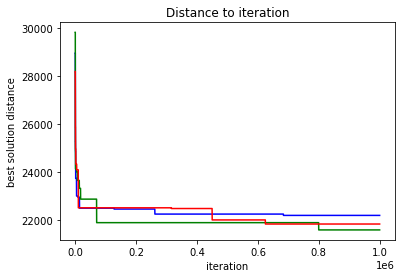

In [205]:
N = 120 # number of cities for random matrix
k = 100000 # number of samples
Xsym = [None]*k
Xasym = [None]*k
Xber = [None]*k
number_of_better_solution = 0

max_distance = 500
Matrixx_sym = symetric_random_instance(N, 1, max_distance) # distances from 1 to 100
Matrixx_asym = asymetric_random_instance(N, 1, max_distance)

Matrixx_ber = set_Matrix()
Nber = np.shape(Matrixx_ber)[0]

#initial step
trace_sym = random.sample(range(N),N)
trace_asym = random.sample(range(N),N)
trace_ber = random.sample(range(Nber),Nber)

min_weight_sym  = get_weight(trace_sym, Matrixx_sym)# = funkcja liczaca wage
min_weight_asym  = get_weight(trace_asym, Matrixx_asym)# = funkcja liczaca wage
min_weight_ber  = get_weight(trace_ber, Matrixx_ber)# = funkcja liczaca wage
#print(min_weight)
# min_permutation = trace
# Wielka pentla powtarzajaca sie k-razy
for i in range(k):
    new_trace = random.sample(range(N),N)
    new_weight = get_weight(new_trace, Matrixx_sym)# = funkcja liczaca wage
    if (new_weight < min_weight_sym):
        min_weight_sym = new_weight
        trace_sym = new_trace
        #number_of_better_solution += 1
    Xsym[i] = min_weight_sym

for i in range(k):
    new_trace = random.sample(range(N),N)
    new_weight = get_weight(new_trace, Matrixx_asym)# = funkcja liczaca wage
    if (new_weight < min_weight_asym):
        min_weight_asym = new_weight
        trace_asym = new_trace
    Xasym[i] = min_weight_asym

for i in range(k):
    new_trace = random.sample(range(Nber),Nber)
    new_weight = get_weight(new_trace, Matrixx_ber)# = funkcja liczaca wage
    if (new_weight < min_weight_ber):
        min_weight_ber = new_weight
        trace_ber = new_trace
    Xber[i] = min_weight_ber

print('symetryczne : \t', min_weight_sym)
print('asymetryczne : \t', min_weight_asym)
print('Berlin52 : \t', min_weight_ber)
#print(number_of_better_solution)

plt.plot(Xsym, '-b')
plt.plot(Xasym, '-g')
plt.plot(Xber, '-r')
plt.xlabel('iteration')
plt.ylabel('best solution distance')
# giving a title to my graph
plt.title('Distance to iteration')
plt.show()
#print_solution(trace)


## Metoda najbliższych sąsiadów (odległość)
1. Chose start city
2. Find nearest neighbour for that city ang go there
    - min_distance = distance(current_city, 0_city)
    - min_city = 0_city
    - for i in (N): 
    -   new_distance = distance(current_city, i_city)
    -   if (new_distance < min_distance>) -> min_distance = new_distance, min_city = i_city
    - current_city = min_city
    - add current_city to the way (permutation)
3. Repeat 2nd step for N-times where N is the number of cities

In [207]:
def nearest_neighbour(city_index, Distance_Matrix):
    n = np.shape(Distance_Matrix)[0]
    if(city_index != 0):
        min = Distance_Matrix[city_index][0]
        min_ind = 0
    else:
        min = Distance_Matrix[city_index][1]
        min_ind = 1
    for i in range(n):
        if(city_index != i):
            if(Distance_Matrix[city_index][i] < min):
                min = Distance_Matrix[city_index][i]
                min_ind = i
    return min_ind


In [208]:
def swapPositions(list, pos1, pos2):
    list[pos1], list[pos2] = list[pos2], list[pos1]
    return list

In [209]:
N = 120 # number of cities
Matrixx = symetric_random_instance(N, 1, 100)
Matrixx = set_Matrix()
N = np.shape(Matrixx)[0]
solution = [None]*N

for i in range(N):
    go_to = nearest_neighbour(i, Matrixx)
    solution[i] = go_to

distance = get_weight(solution, Matrixx)
print(distance)

18811.0


In [210]:
N = 120 # number of cities

Matrixx = symetric_random_instance(N, 1, 100) # random
Matrixx = set_Matrix()  # instance

N = np.shape(Matrixx)[0]
best_solution = [None]*N
current_solution = [None]*N

for i in range(N):
    go_to = nearest_neighbour(i, Matrixx)
    best_solution[i] = go_to
best_distance = get_weight(best_solution, Matrixx)

print(best_distance)

for i in range(1, N):
    for j in range(N):
        go_to = nearest_neighbour(i, Matrixx)
        current_solution[j] = go_to
    current_distance = get_weight(current_solution, Matrixx)
    if(current_distance < best_distance):
        best_solution = current_solution

print(best_distance)

18811.0
18811.0


## Metoda najbliższych sąsiadów (swap)

In [211]:
def nearest_swap_neighbour(city_list, Distance_Matrix):
    leng = len(city_list)
    min_weight = get_weight(city_list, Distance_Matrix)
    best_trace = city_list.copy()
    current_trace = city_list.copy()
    for i in range(int(leng/2 +1 )):
        for j in range(leng):
            current_trace = city_list.copy()
            current_trace = swapPositions(current_trace, i, j)
            current_weight = get_weight(current_trace, Distance_Matrix)
            if(current_weight < min_weight):
                best_trace = current_trace
                min_weight = current_weight
    return best_trace

In [220]:
N = 120 # number of cities
k = 100 # how many tryes

Matrixx_sym = symetric_random_instance(N, 1, 500)   # random
Matrixx_ber = set_Matrix()  # instance

Nber = np.shape(Matrixx_ber)[0]

best_solution = [None]*N
current_solution = [None]*N

trace = random.sample(range(N),N)
min_weight  = get_weight(trace, Matrixx)# = funkcja liczaca wage
print(min_weight)

for i in range(k):
    trace = nearest_swap_neighbour(trace, Matrixx)

print(get_weight(trace, Matrixx))
#print(trace)



[[   0.  666.  281. ...  217.  789. 1220.]
 [ 666.    0.  649. ...  596. 1421. 1716.]
 [ 281.  649.    0. ...  463.  995. 1483.]
 ...
 [ 217.  596.  463. ...    0.  829. 1150.]
 [ 789. 1421.  995. ...  829.    0.  624.]
 [1220. 1716. 1483. ... 1150.  624.    0.]]
52
30186.0
11481.0


In [225]:
N = 120 # number of cities

Matrixx_ber = set_Matrix()  # instance
Matrixx_sym = symetric_random_instance(N, 1, 500)   # random

Nber = np.shape(Matrixx_ber)[0]

best_solution = [None]*N
current_solution = [None]*N

trace = random.sample(range(N),N)
min_weight_sym  = get_weight(trace, Matrixx_sym)# = funkcja liczaca wage
print(min_weight_sym)

while(True):
    trace_old = trace.copy()
    trace = nearest_swap_neighbour(trace, Matrixx_sym) # whole step not just simple swap - if this don't update trace then stop
    if (get_weight(trace_old, Matrixx_sym) >= get_weight(trace, Matrixx_sym)):
        break

print(get_weight(trace, Matrixx_sym))
#print(trace)

31603
30189


## Metoda 2-opt

In [213]:
def invert(city_list, i, j):
    leng = len(city_list)
    leng_sub_list = j - i 
    current_trace = city_list.copy()
    for k in range(int(leng_sub_list/2 + 1)):
        current_trace = swapPositions(current_trace, i, j - k)
        #print(leng_sub_list)
        i += 1
        # print(current_trace)

    return current_trace

In [215]:
N = 50 # number of cities
k = 10000

Matrixx = symetric_random_instance(N, 1, 100) # random
Matrixx = set_Matrix()  # instance
N = np.shape(Matrixx)[0]

best_solution = [None]*N
current_solution = [None]*N

trace = random.sample(range(N),N)
for i in range(N):
    go_to = nearest_neighbour(i, Matrixx)
    best_solution[i] = go_to
min_weight  = get_weight(best_solution, Matrixx)# = funkcja liczaca wage
print(min_weight)

improved = True
while(improved):
    for i in range(N-2):
        for j in range(i, N-1):
            current_solution = invert(best_solution, i, j)
            current_distance = get_weight(current_solution, Matrixx)
            if(current_distance < min_weight):
                best_solution = current_solution
                min_weight = current_distance
                i = 0
                j = 0

    improved = False


print(get_weight(best_solution, Matrixx))

18811.0
13072.0
